In [2]:
import pandas as pd
import numpy as np
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA

In [3]:
def visualization(data):
    sns.displot(data)

In [4]:
def classification(y_predict_proba, y_test, y_predict, algorithm):
    #define metrics
    # Source for ROC Curve: https://www.statology.org/plot-roc-curve-python/ 
    auc = roc_auc_score(y_test, y_predict_proba)
    fpr, tpr, _ = roc_curve(y_test,  y_predict_proba)
    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title("ROC curve for " + algorithm)
    plt.show()
    accuracy = np.mean(y_predict==y_test)
    confusionMatrix = confusion_matrix(y_test, y_predict)
    precision = 0
    recall = 0
    f1 = 0
    precision = confusionMatrix[1][1]/(confusionMatrix[1][1]+confusionMatrix[1][0])
    recall = confusionMatrix[1][1]/(confusionMatrix[1][1]+confusionMatrix[0][1])
    f1 = 2*(precision*recall)/(precision+recall)
    return accuracy, confusionMatrix, f1, auc

def support_vector_machine(x_train_c, x_test_c, y_train_c, y_test_c):
    x_train = x_train_c.copy(deep = True)
    x_test = x_test_c.copy(deep = True)
    y_train = y_train_c.copy(deep = True)
    y_test = y_test_c.copy(deep = True)
    svc = svm.SVC(kernel = "linear")
    svc.fit(x_train, y_train)
    y_predict = svc.predict(y_test)
    y_predict_proba = svc.predict_proba(x_test)[::,1]
    accuracy, confusionMatrix, f1, auc = classification(y_predict_proba, y_test, y_predict, "SVM")
    return {"accuracy": accuracy, "confusion_matrix":confusionMatrix, "F1-score":f1,'ROC_AUC': auc}

def decision_tree(x_train_c, x_test_c, y_train_c, y_test_c):
    x_train = x_train_c.copy(deep = True)
    x_test = x_test_c.copy(deep = True)
    y_train = y_train_c.copy(deep = True)
    y_test = y_test_c.copy(deep = True)
    tree = DecisionTreeClassifier(criterion = "entropy", splitter="random").fit(x_train, y_train)
    y_predict = tree.predict(x_test)
    y_predict_proba = tree.predict_proba(x_test)[::,1]
    accuracy, confusionMatrix, f1, auc = classification(y_predict_proba, y_test, y_predict, "Decision Tree")
    return {"accuracy": accuracy, "confusion_matrix":confusionMatrix, "F1-score":f1,'ROC_AUC': auc}
    
def logistic_regression(x_train_c, x_test_c, y_train_c, y_test_c):
    x_train = x_train_c.copy(deep = True)
    x_test = x_test_c.copy(deep = True)
    y_train = y_train_c.copy(deep = True)
    y_test = y_test_c.copy(deep = True)
    logistic = LogisticRegression().fit(x_train, y_train)
    y_predict = logistic.predict(x_test)
    y_predict_proba = logistic.predict_proba(x_test)[::,1]
    accuracy, confusionMatrix, f1, auc = classification(y_predict_proba, y_test, y_predict, "Logistic Regression")
    return {"accuracy": accuracy, "confusion_matrix":confusionMatrix, "F1-score":f1,'ROC_AUC': auc,"Logistic coefficients": logistic.coef_}

def xgboost_algorithm(x_train_c, x_test_c, y_train_c, y_test_c):
    x_train = x_train_c.copy(deep = True)
    x_test = x_test_c.copy(deep = True)
    y_train = y_train_c.copy(deep = True)
    y_test = y_test_c.copy(deep = True)
    #https://github.com/Rezar/MLBook/blob/main/codes/Ch9/Ensemble%20Learning%20Methods.ipynb
    gbm = XGBClassifier(max_depth=3, n_estimators=300,learning_rate=0.05).fit(x_train, y_train)
    y_predict = gbm.predict(x_test)
    y_predict_proba = gbm.predict_proba(x_test)[::,1]
    accuracy, confusionMatrix, f1, auc = classification(y_predict_proba, y_test, y_predict, "XGBoost")
    return {"accuracy": accuracy, "confusion_matrix":confusionMatrix, "F1-score":f1,'ROC_AUC': auc}


def catboost_algorithm(x_train_c, x_test_c, y_train_c, y_test_c):
    x_train = x_train_c.copy(deep = True)
    x_test = x_test_c.copy(deep = True)
    y_train = y_train_c.copy(deep = True)
    y_test = y_test_c.copy(deep = True)
    #Source: https://catboost.ai/en/docs/concepts/python-usages-examples
    cat = CatBoostClassifier(iterations=3,learning_rate=1,depth=2).fit(x_train, y_train)
    y_predict = cat.predict(x_test)
    y_predict_proba = cat.predict_proba(x_test)[::,1]
    accuracy, confusionMatrix, f1, auc = classification(y_predict_proba, y_test, y_predict, "CatBoost")
    return {"accuracy": accuracy, "confusion_matrix":confusionMatrix, "F1-score":f1, 'ROC_AUC': auc}
    

def discriminants(x_train_c, x_test_c, y_train_c, y_test_c, d = 1):
    x_train = x_train_c.copy(deep = True)
    x_test = x_test_c.copy(deep = True)
    y_train = y_train_c.copy(deep = True)
    y_test = y_test_c.copy(deep = True)
    model =  LDA()
    precision = 0
    recall = 0
    f1 = 0
    if d>1:
        model = QDA()
        model.fit(x_train,y_train)
        y_predict = model.predict(x_test)
        y_predict_proba = model.predict_proba(x_test)[::,1]
        accuracy, confusionMatrix, f1, auc = classification(y_predict_proba, y_test, y_predict, "QDA")
        return {"accuracy": accuracy, "confusion_matrix":confusionMatrix, "F1-score":f1, 'ROC_AUC': auc}
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    y_predict_proba = model.predict_proba(x_test)[::,1]
    accuracy, confusionMatrix, f1, auc = classification(y_predict_proba, y_test, y_predict, "LDA")
    return {"accuracy": accuracy, "confusion_matrix":confusionMatrix, "F1-score":f1, 'ROC_AUC': auc}

In [5]:
data = pd.read_csv("creditcard.csv")
print("There are", round(len(data[data["Class"]==1])/len(data)*100, 2), "% of cases that are under credit card fraudulent situation.")
print("There are", round(len(data[data["Class"]==0])/len(data)*100, 2), "% of cases that are not under credit card fraudulent situation.")
print("There are", data.isnull().sum().sum(),"null values in the dataset.")

There are 0.17 % of cases that are under credit card fraudulent situation.
There are 99.83 % of cases that are not under credit card fraudulent situation.
There are 0 null values in the dataset.


In [6]:
number_of_ones = len(data[data["Class"]==1])
print("There are", number_of_ones, "fraud cases in the dataset")
fraud_data = data.copy(deep = True)
fraud_data = fraud_data[fraud_data["Class"]==1]
data_for_classify = data.copy(deep = True)
data_for_classify = data_for_classify[data_for_classify["Class"]==0]

There are 492 fraud cases in the dataset


In [7]:
data_for_classify = data_for_classify.sample(frac = number_of_ones/len(data_for_classify), replace = False)
data_for_classify = pd.concat([fraud_data, data_for_classify])
data_for_classify = data_for_classify.reset_index()
data_for_classify.drop(["index"], axis = 1, inplace = True)

/Users/maxma/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


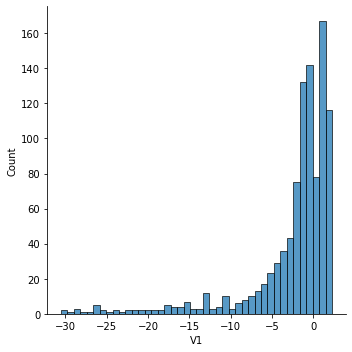

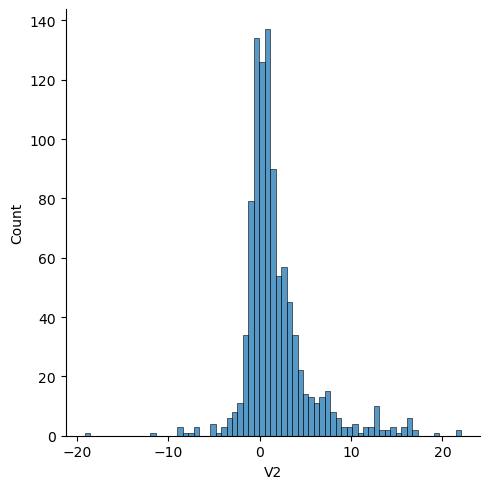

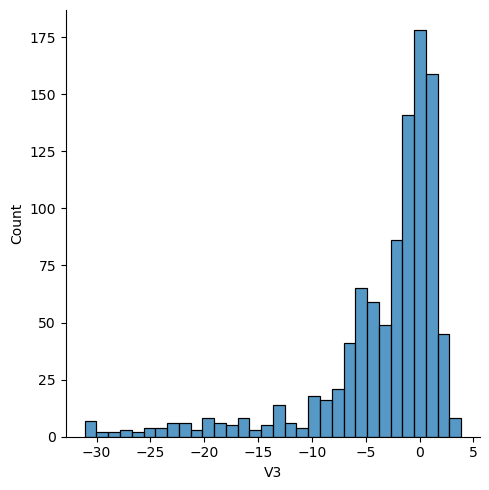

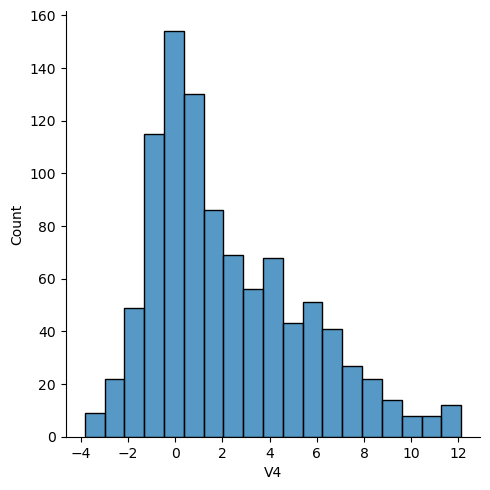

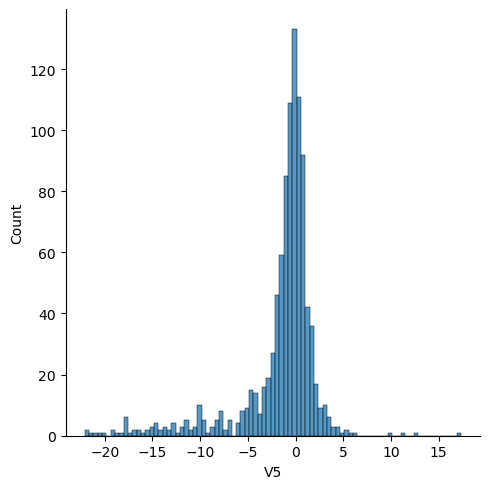

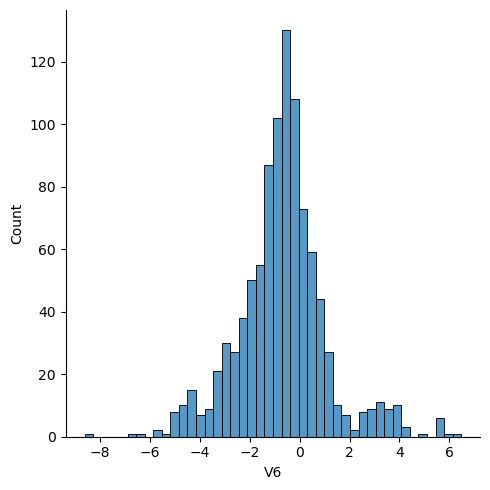

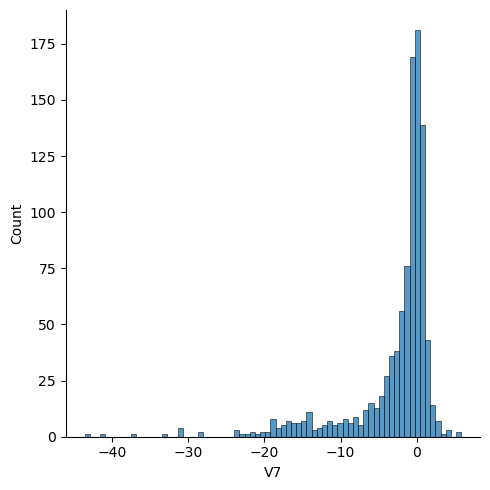

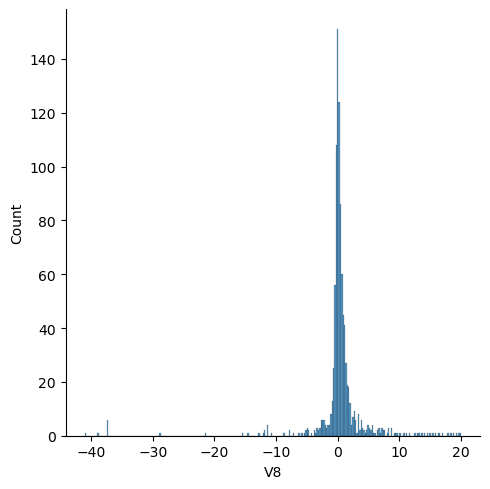

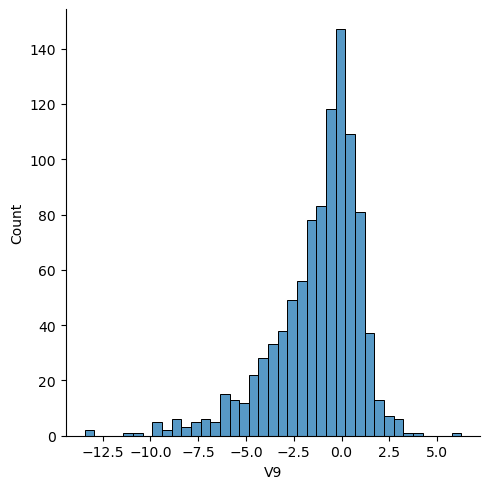

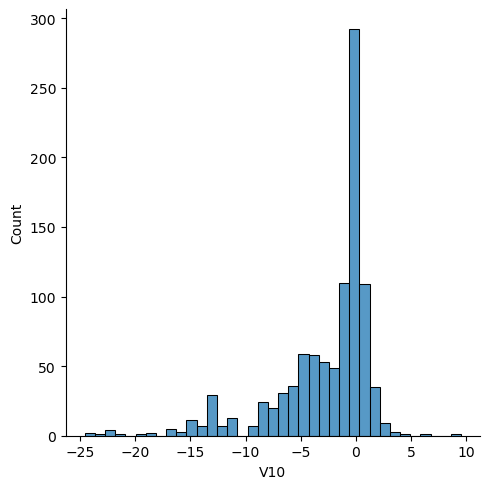

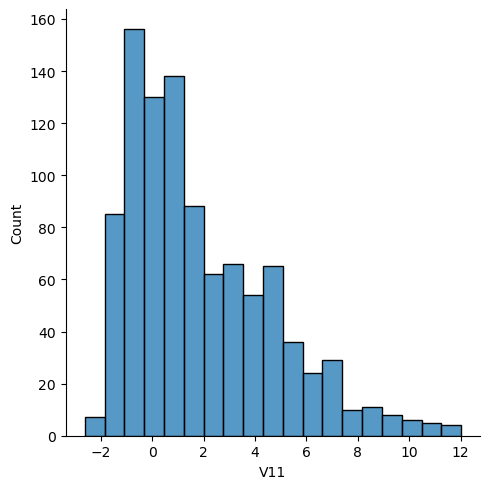

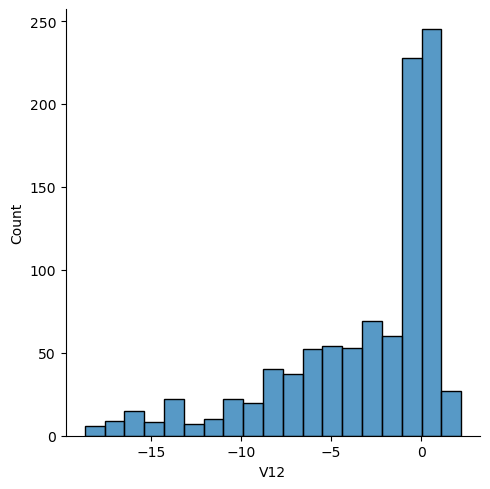

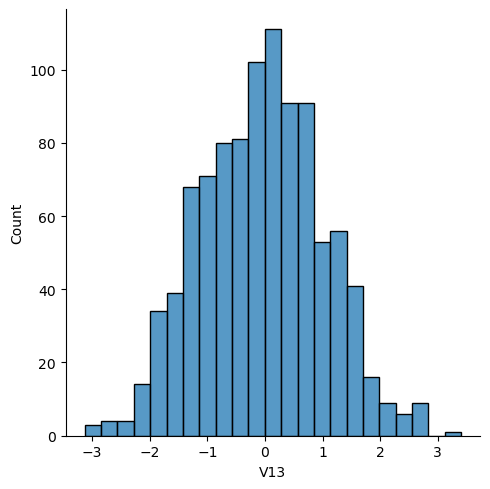

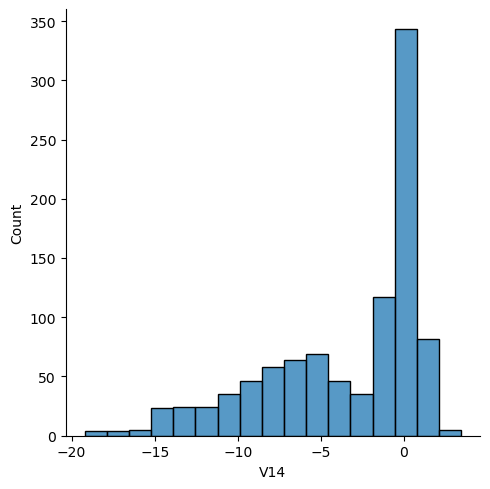

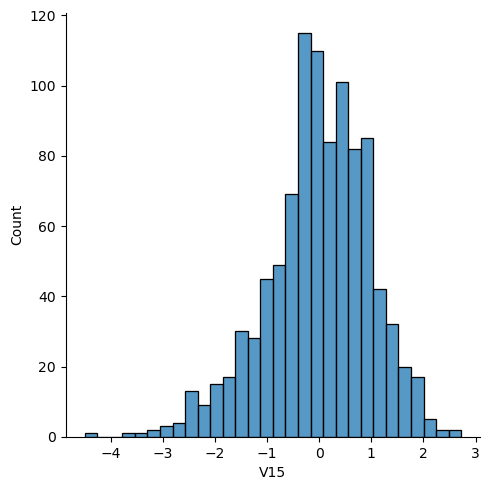

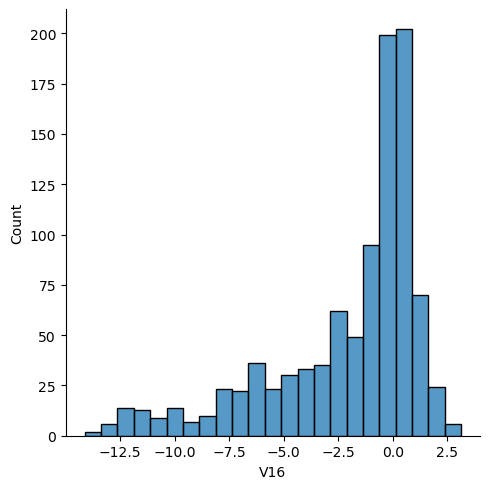

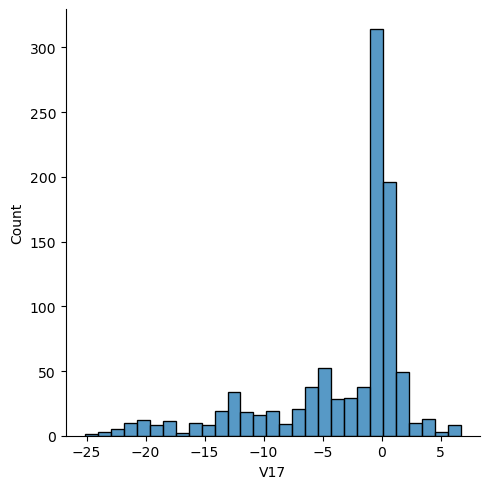

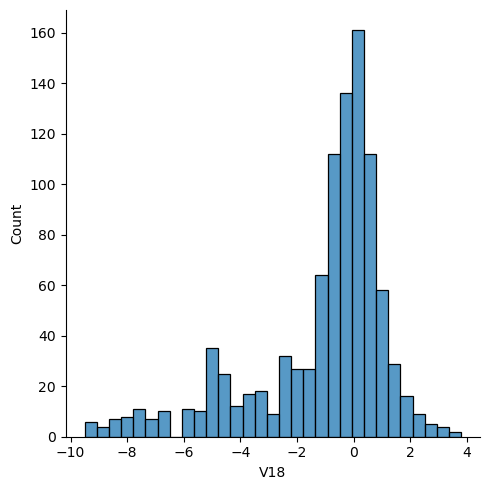

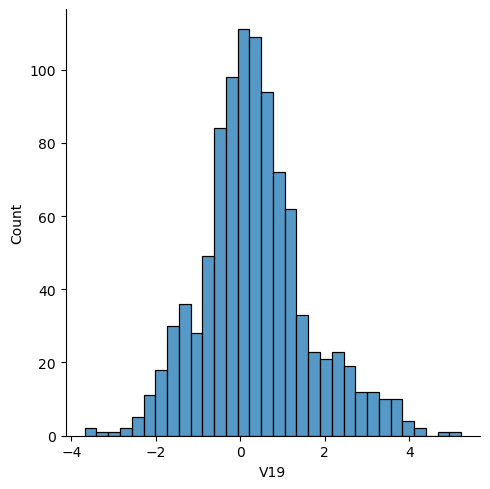

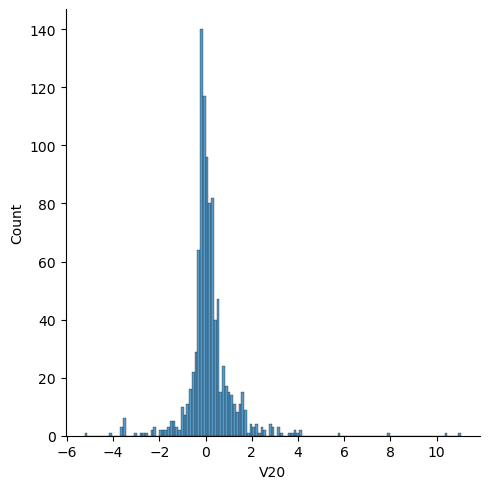

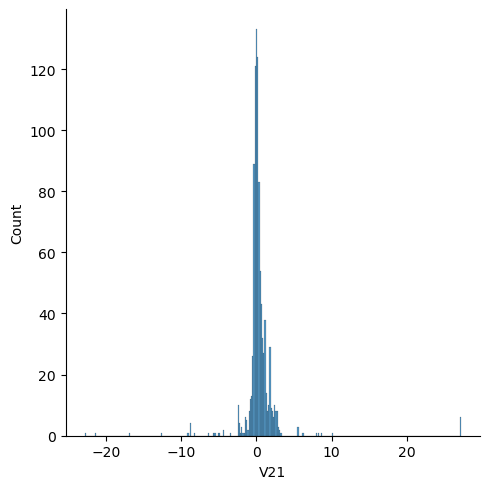

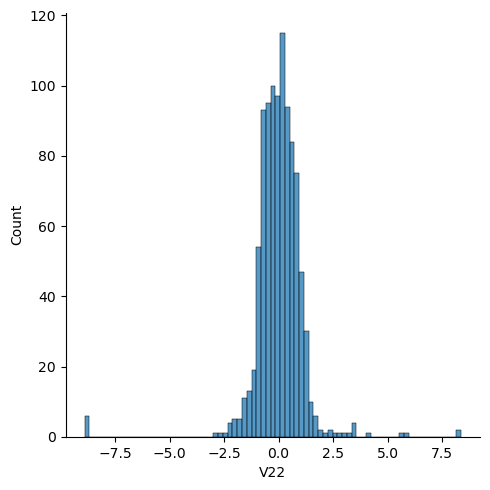

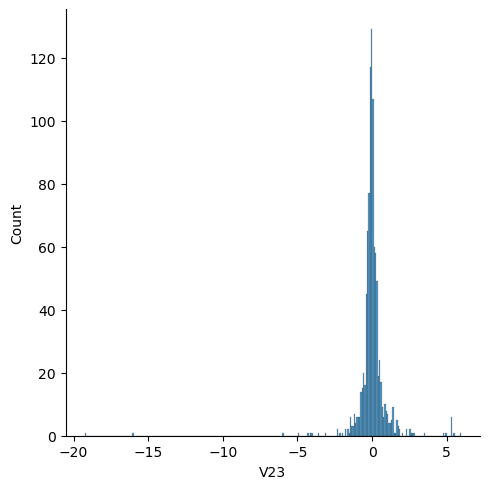

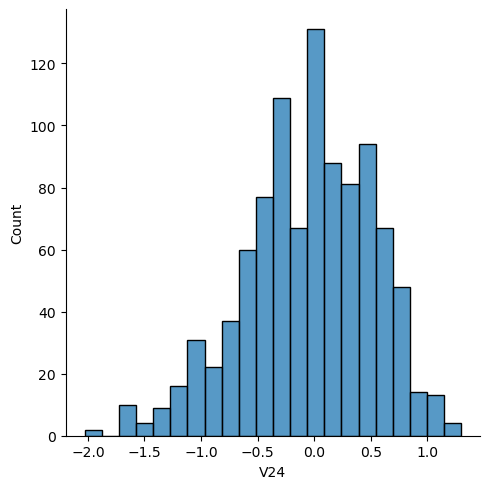

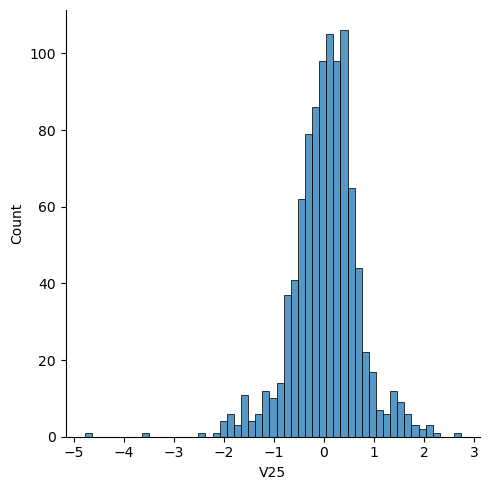

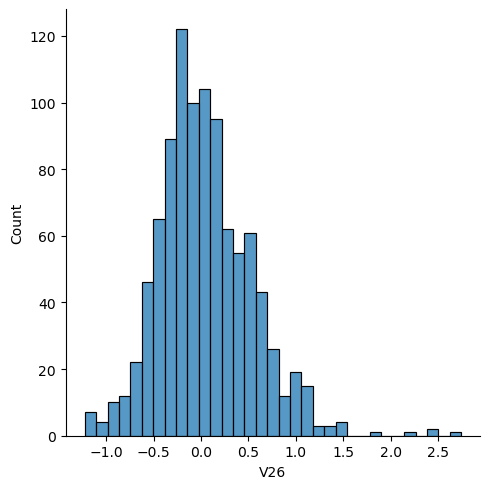

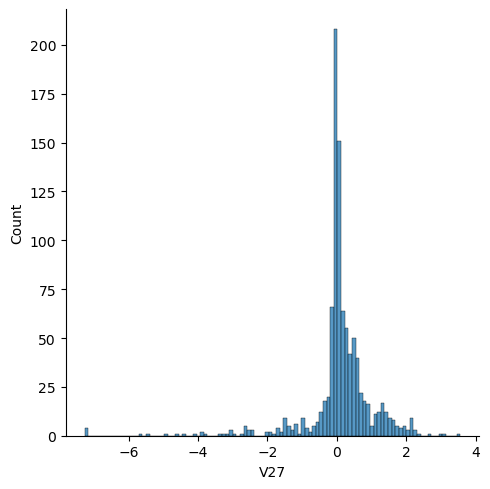

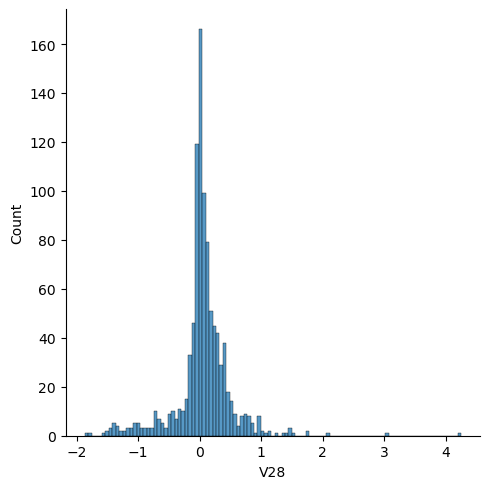

In [8]:
for i in range(28):
    visualization(data_for_classify["V"+str(i+1)])

In [9]:
# because features from V1 to V28 are scaled, and some features like V12 and V16 are having a wider range. 
# Using Robust Scaling is a better way than standard scaling 
scaler = StandardScaler()
# scaling time and amount
time_val = scaler.fit_transform(data_for_classify[["Time"]].values) 
data_for_classify["Time Scaled"] = time_val
amount_val = scaler.fit_transform(data_for_classify[["Amount"]].values)
data_for_classify["Amount_Scaled"] = amount_val
data_for_classify.drop(["Time","Amount"], axis = 1, inplace = True)

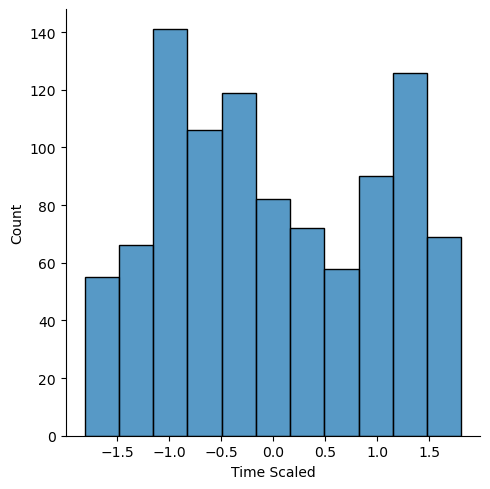

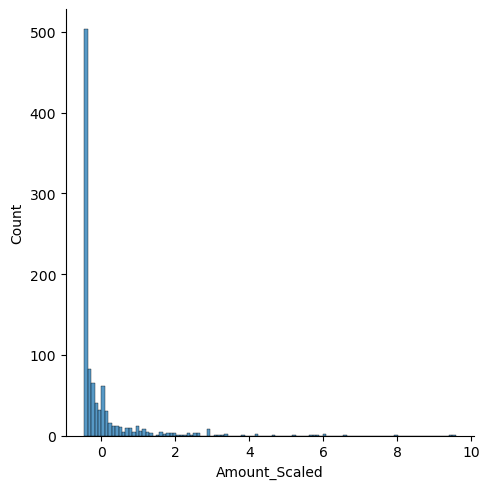

In [10]:
visualization(data_for_classify["Time Scaled"])
visualization(data_for_classify["Amount_Scaled"])

In [11]:
y = data_for_classify["Class"]
data_for_classify.drop("Class", axis = 1, inplace = True)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data_for_classify, y, train_size = 0.66,test_size = 0.34, random_state = 1234)

In [13]:
print("Number of nulls: ")
print("x_train: ", x_train.isnull().sum().sum(), ";y_train: ", y_train.isnull().sum().sum())
print("x_test: ", x_test.isnull().sum().sum(), ";y_test: ", y_test.isnull().sum().sum())

Number of nulls: 
x_train:  0 ;y_train:  0
x_test:  0 ;y_test:  0


0:	learn: 0.2316253	total: 55.8ms	remaining: 112ms
1:	learn: 0.2143910	total: 57.3ms	remaining: 28.6ms
2:	learn: 0.1957227	total: 58.3ms	remaining: 0us


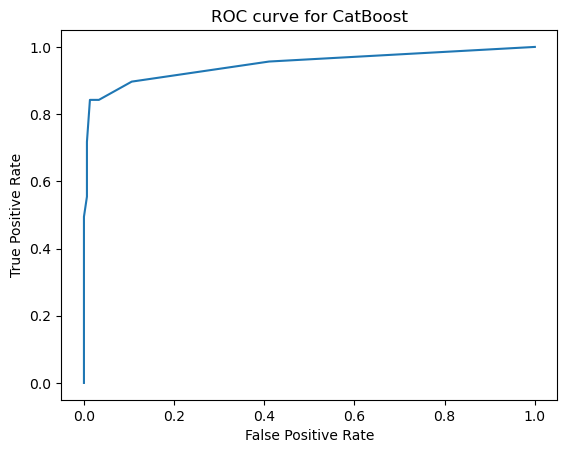

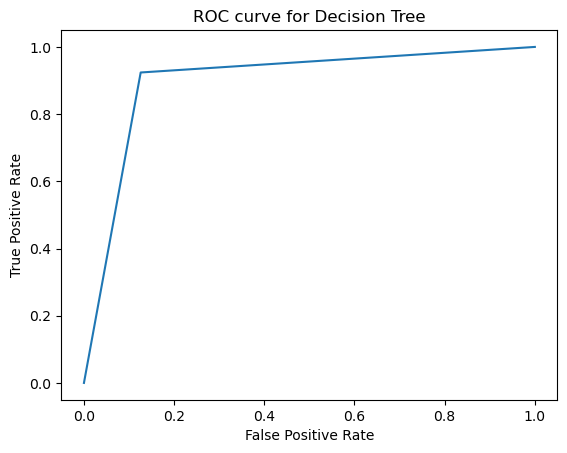

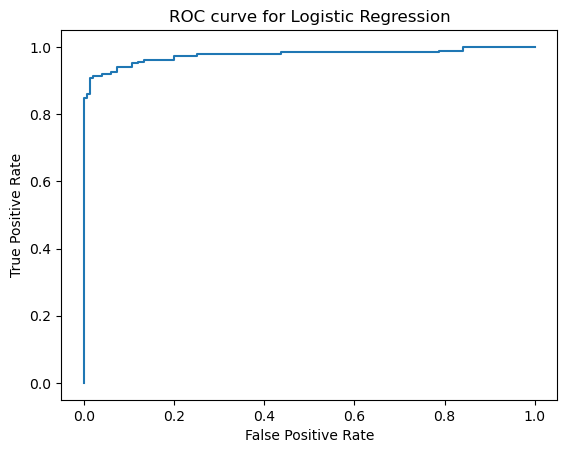

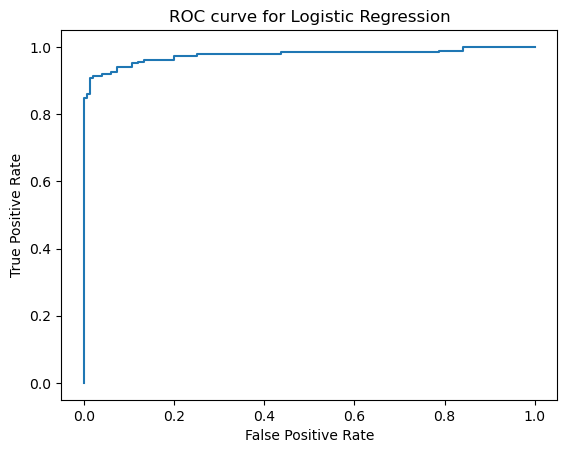

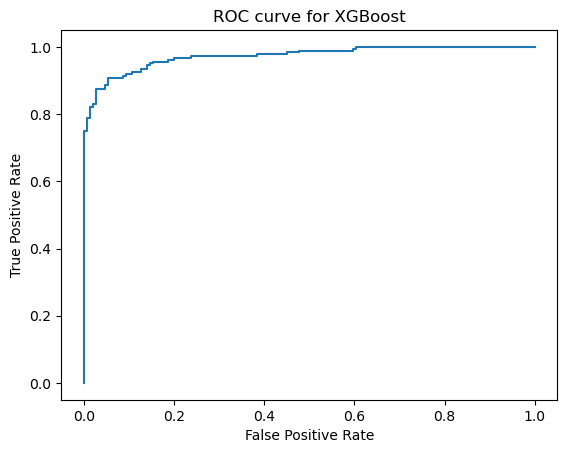

In [14]:
classifier_all_feature = {
    "CatBoost": catboost_algorithm(x_train, x_test, y_train, y_test),
    "Decision Tree": decision_tree(x_train, x_test, y_train, y_test),
    "Logistic": logistic_regression(x_train, x_test, y_train, y_test),
    "SVM": logistic_regression(x_train, x_test, y_train, y_test),
    "XGBoost": xgboost_algorithm(x_train, x_test, y_train, y_test),
}

In [15]:
classifier_all_feature

{'CatBoost': {'accuracy': 0.9014925373134328,
  'confusion_matrix': array([[147,   4],
         [ 29, 155]]),
  'F1-score': 0.9037900874635568,
  'ROC_AUC': 0.9475957385545638},
 'Decision Tree': {'accuracy': 0.9014925373134328,
  'confusion_matrix': array([[132,  19],
         [ 14, 170]]),
  'F1-score': 0.9115281501340483,
  'ROC_AUC': 0.8990426144543622},
 'Logistic': {'accuracy': 0.9402985074626866,
  'confusion_matrix': array([[147,   4],
         [ 16, 168]]),
  'F1-score': 0.9438202247191011,
  'ROC_AUC': 0.9755974661675785,
  'Logistic coefficients': array([[ 0.13859657,  0.14422014, -0.23767831,  1.18896595,  0.48167263,
          -0.0547778 ,  0.4350034 , -0.58393045,  0.21065792, -0.96628667,
           0.20102776, -0.31840811, -0.20158934, -1.07983125,  0.08690857,
          -0.81603205, -0.92343635,  0.57989798, -0.28072031, -0.27650412,
          -0.20980209,  0.25988746, -0.40338919,  0.10582585, -0.25808792,
          -0.28961833,  0.21974106,  0.76534246, -0.5315264 , 